In [63]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import statsmodels.api as sm
from cmh import CMH
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Read CSV
df_1 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_1_choices.csv')
df_2 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_2_choices.csv')
df_3 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_3_choices.csv')
df_4 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_4_choices.csv')
df_5 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_5_choices.csv')
df_6 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_6_choices.csv')
df_7 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_7_choices.csv')
df_8 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_8_choices.csv')
df_9 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_9_choices.csv')
df_10 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_10_choices.csv')
df_11 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_11_choices.csv')
df_12 = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/switch_results/patient_12_choices.csv')

In [4]:
# Filter
df_1 = df_1[df_1['user_id'] != 'tim']
df_2 = df_2[df_2['user_id'] != 'tim']
df_3 = df_3[df_3['user_id'] != 'tim']
df_4 = df_4[df_4['user_id'] != 'tim']
df_5 = df_5[df_5['user_id'] != 'tim']
df_6 = df_6[df_6['user_id'] != 'tim']
df_7 = df_7[df_7['user_id'] != 'tim']
df_8 = df_8[df_8['user_id'] != 'tim']
df_9 = df_9[df_9['user_id'] != 'tim']
df_10 = df_10[df_10['user_id'] != 'tim']
df_11 = df_11[df_11['user_id'] != 'tim']
df_12 = df_12[df_12['user_id'] != 'tim']

In [5]:
# Add patient column
df_1['patient'] = 1
df_2['patient'] = 2
df_3['patient'] = 3
df_4['patient'] = 4
df_5['patient'] = 5
df_6['patient'] = 6
df_7['patient'] = 7
df_8['patient'] = 8
df_9['patient'] = 9
df_10['patient'] = 10
df_11['patient'] = 11
df_12['patient'] = 12

In [6]:
# Concatenate the DataFrames
dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]
all_choices = pd.concat(dfs, ignore_index=True)

In [7]:
# Order of seeing CDSS (1) or SOC (2)
# a and b are opposites of each other
# a = 122121122112
# b = 211212211221
a_list = [1,2,2,1,2,1,1,2,2,1,1,2]
b_list = [2,1,1,2,1,2,2,1,1,2,2,1]

In [8]:
# Define if see cdss or soc
def view_fun(row):
    patient = row['patient']
    user_archetype = row['user_archetype']
    if user_archetype == 'a':
        view = a_list[patient-1]
    elif user_archetype == 'b':
        view = b_list[patient-1]
    if view == 1:
        return 'cdss'
    elif view == 2:
        return 'soc'

all_choices['view'] = all_choices.apply(lambda row: view_fun(row), axis=1)

In [8]:
all_choices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         396 non-null    object
 1   user_archetype  396 non-null    object
 2   switch_choice   396 non-null    object
 3   explanation     389 non-null    object
 4   patient         396 non-null    int64 
 5   view            396 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.7+ KB


In [9]:
all_choices

,user_id,user_archetype,switch_choice,explanation,patient,view
0,0,a,dont_switch,"temps increasing, systolics dropping, still on...",1,cdss
1,1,b,dont_switch,The respiratory rates are increasing.,1,soc
2,2,a,dont_switch,30 hours is not long enough to assess for resp...,1,cdss
3,3,b,dont_switch,"Raised inflammatory markers (raised CRP, RR>20",1,soc
4,4,a,dont_switch,Based on CURB score the patient is at least CU...,1,cdss
...,...,...,...,...,...,...
391,28,a,switch,Stable for 24 hours no clear red flags,12,soc
392,29,b,dont_switch,GCS low; low grade fevers,12,cdss
393,30,a,dont_switch,"Low GCS., I would want more information about ...",12,soc
394,31,b,dont_switch,Low GCS,12,cdss


In [9]:
# Add demographics 
demographics = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/demographic_results/demographics_processed.csv')
all_choices['user_id'] = all_choices['user_id'].astype(int)
all_choices = pd.merge(all_choices, demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])

In [10]:
all_choices

,user_id,user_archetype,switch_choice,explanation,patient,view,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
0,0,a,dont_switch,"temps increasing, systolics dropping, still on...",1,cdss,30s,Male,Pharmacist,Other,NaN
1,0,a,switch,"apyrexial, HR returned to normal",2,soc,30s,Male,Pharmacist,Other,NaN
2,0,a,dont_switch,"temp and HR increasing, GCS dropped in last 24...",3,soc,30s,Male,Pharmacist,Other,NaN
3,0,a,switch,"temps and other vitals all ok, and have been s...",4,cdss,30s,Male,Pharmacist,Other,NaN
4,0,a,switch,all vitals in range,5,soc,30s,Male,Pharmacist,Other,NaN
...,...,...,...,...,...,...,...,...,...,...,...
391,32,a,switch,"meets criteria for switch, would also consider...",8,soc,20s,Female,Other,Other,Slightly familiar
392,32,a,dont_switch,would need more information around patient pas...,9,soc,20s,Female,Other,Other,Slightly familiar
393,32,a,dont_switch,Would require more information around clinical...,10,cdss,20s,Female,Other,Other,Slightly familiar
394,32,a,switch,consider whether patient is clinically improvi...,11,cdss,20s,Female,Other,Other,Slightly familiar


In [12]:
all_choices['view'].value_counts()
all_choices['switch_choice'].value_counts()
all_choices['patient'].value_counts()

view
cdss    198
soc     198
Name: count, dtype: int64

switch_choice
switch         245
dont_switch    151
Name: count, dtype: int64

patient
1     33
2     33
3     33
4     33
5     33
6     33
7     33
8     33
9     33
10    33
11    33
12    33
Name: count, dtype: int64

In [13]:
all_choices.groupby(['patient', 'view'])['switch_choice'].value_counts()

patient  view  switch_choice
1        cdss  dont_switch      17
         soc   dont_switch      16
2        cdss  switch           16
         soc   switch           15
               dont_switch       2
3        cdss  dont_switch      13
               switch            3
         soc   dont_switch      11
               switch            6
4        cdss  switch           15
               dont_switch       2
         soc   switch           16
5        cdss  switch           16
         soc   switch           15
               dont_switch       2
6        cdss  switch           13
               dont_switch       4
         soc   switch           16
7        cdss  dont_switch      12
               switch            5
         soc   switch           12
               dont_switch       4
8        cdss  switch           10
               dont_switch       6
         soc   switch            9
               dont_switch       8
9        cdss  switch           14
               dont_switch

# Chi-squared

In [20]:
# Contingency table
contingency_table = pd.crosstab(all_choices['view'], all_choices['switch_choice'])
#contingency_table = pd.crosstab(all_choices['switch_choice'], all_choices['view'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square: {chi2}, p-value: {p}")

Chi-square: 3.4681443438302475, p-value: 0.06256145645171585


In [15]:
# Subset the data for the specific patient
subset_df = all_choices[all_choices['patient'] == 7]
# Contingency table
contingency_table = pd.crosstab(subset_df['view'], subset_df['switch_choice'])
contingency_table
# Subset the data for the specific patient
subset_df = all_choices[all_choices['patient'] == 6]
# Contingency table
contingency_table = pd.crosstab(subset_df['view'], subset_df['switch_choice'])
contingency_table

switch_choice,dont_switch,switch
view,,
cdss,12,5
soc,4,12


switch_choice,dont_switch,switch
view,,
cdss,4,13
soc,0,16


In [23]:
contingency_table

array([[1, 2],
       [3, 4]])

In [32]:
contingency_table = np.array([[6, 13], [0, 19]])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=4.947916666666667, pvalue=0.026122128524138182, dof=1, expected_freq=array([[ 3., 16.],
       [ 3., 16.]]))

In [66]:
contingency_table = np.array([[4, 13], [0, 16]])
chi2_contingency(contingency_table, correction=False)

Chi2ContingencyResult(statistic=4.283975659229209, pvalue=0.03847325866217401, dof=1, expected_freq=array([[ 2.06060606, 14.93939394],
       [ 1.93939394, 14.06060606]]))

In [16]:
# Loop through each unique patient
for patient in all_choices['patient'].unique():
    # Subset the data for the specific patient
    subset_df = all_choices[all_choices['patient'] == patient]
    
    # Contingency table
    contingency_table = pd.crosstab(subset_df['view'], subset_df['switch_choice'])
    
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Patient: {patient}")
    print(f"Chi-square: {chi2}, p-value: {p}")
    if p < 0.05:
        print(f"  -> The differences in are statistically significant.\n")
    else:
        print(f"  -> The differences in are ***NOT*** statistically significant.\n")
    print("-" * 30)

Patient: 1
Chi-square: 0.0, p-value: 1.0
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Patient: 2
Chi-square: 0.47012867647058815, p-value: 0.4929279773130959
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Patient: 3
Chi-square: 0.45622702205882326, p-value: 0.49939257864130693
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Patient: 4
Chi-square: 0.4701286764705882, p-value: 0.4929279773130959
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Patient: 5
Chi-square: 0.47012867647058815, p-value: 0.4929279773130959
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Patient: 6
Chi-square: 2.35979494168357, p-value: 0.12449855341046362
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Patient: 7
Chi-squa

In [131]:
all_choices.columns

Index(['user_id', 'user_archetype', 'switch_choice', 'explanation', 'patient',
       'view', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new',
       'ai_familiarity_new', 'view_binary', 'switch_choice_binary'],
      dtype='object')

In [51]:
# Loop through each demographic
demographic_list = ['age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
for demographic in demographic_list:
    # Contingency table
    contingency_table = pd.crosstab(all_choices[demographic], all_choices['switch_choice'])
    
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Demographic: {demographic}")
    print(f"Chi-square: {chi2}, p-value: {p}")
    if p < 0.05:
        print(f"  -> The differences in are statistically significant.\n")
    else:
        print(f"  -> The differences in are ***NOT*** statistically significant.\n")
    print("-" * 30)

Demographic: age_new
Chi-square: 4.897449438528277, p-value: 0.2979825941285748
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Demographic: sex_new
Chi-square: 0.0008028111907014628, p-value: 0.9773958248388864
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Demographic: medical_speciality_new
Chi-square: 6.56699553993783, p-value: 0.08705748178007759
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Demographic: grade_new
Chi-square: 0.9749377328982692, p-value: 0.32345180222146486
  -> The differences in are ***NOT*** statistically significant.

------------------------------
Demographic: ai_familiarity_new
Chi-square: 6.069293585736774, p-value: 0.10828718138210097
  -> The differences in are ***NOT*** statistically significant.

------------------------------


In [33]:
# Loop through each unique patient
for patient in all_choices['patient'].unique():
    # Loop through each demographic
    demographic_list = ['age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
    for demographic in demographic_list:
        # Subset the data for the specific patient
        subset_df = all_choices[all_choices['patient'] == patient]
        # Contingency table
        contingency_table = pd.crosstab(subset_df[demographic], subset_df['switch_choice'])
        
        # Chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:
            print(f"Patient: {patient}")
            print(f"Demographic: {demographic}")
            print(f"Chi-square: {chi2}, p-value: {p}")
            print(f"  -> The differences in are statistically significant.\n")
        #else:
        #    print(f"  -> The differences in are ***NOT*** statistically significant.\n")
        #print("-" * 30)
print('Done')

Done


In [32]:
# Filter for demographics and test

# Loop through each demographic
demographic_list = ['age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
for demographic in demographic_list:
    for group in all_choices[demographic].unique():
        if group == group: # Filter out nan
            sub_df = all_choices[all_choices[demographic] == group]
            # Contingency table
            contingency_table = pd.crosstab(sub_df['view'], sub_df['switch_choice'])
            
            # Chi-square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            if p < 0.05:
                print(f"Demographic: {demographic}")
                print(f"group: {group}")
                print(f"Chi-square: {chi2}, p-value: {p}")
                print(f"  -> The differences in are statistically significant.\n")
            #else:
            #    print(f"  -> The differences in are ***NOT*** statistically significant.\n")
            #print("-" * 30)
print('Done')


Done


In [36]:
# Filter for demographics and test for specific patients

# Loop through each demographic
demographic_list = ['age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
for demographic in demographic_list:
    for group in all_choices[demographic].unique():
        if group == group: # Filter out nan
            # Loop through each unique patient
            for patient in all_choices['patient'].unique():
                # Subset the data for the specific patient
                subset_df = all_choices[all_choices['patient'] == patient]
                sub_df = subset_df[subset_df[demographic] == group]
                # Contingency table
                contingency_table = pd.crosstab(sub_df['view'], sub_df['switch_choice'])
                
                # Chi-square test
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                if p < 0.05:
                    print(f"Patient: {patient}")
                    print(f"Demographic: {demographic}")
                    print(f"group: {group}")
                    print(f"Chi-square: {chi2}, p-value: {p}")
                    print(f"  -> The differences in are statistically significant.\n")
                    print(contingency_table)
                #else:
                #    print(f"  -> The differences in are ***NOT*** statistically significant.\n")
                #print("-" * 30)
print('Done')

Patient: 7
Demographic: sex_new
group: Male
Chi-square: 3.8503124999999994, p-value: 0.04973672306126012
  -> The differences in are statistically significant.

switch_choice  dont_switch  switch
view                              
cdss                     7       3
soc                      1       7
Patient: 7
Demographic: grade_new
group: Consultant
Chi-square: 3.915805785123967, p-value: 0.04783407913543005
  -> The differences in are statistically significant.

switch_choice  dont_switch  switch
view                              
cdss                     8       3
soc                      2       8
Done


# Plot

<Axes: xlabel='view', ylabel='switch_choice'>

Text(0.5, 1.0, 'Heatmap of Switch Choice by View')

Text(0.5, 606.7222222222223, 'View')

Text(158.08159722222223, 0.5, 'Switch Choice')

<Axes: xlabel='switch_choice'>

Text(0.5, 1.0, 'Stacked Bar Chart of Switch Choice by View')

Text(0.5, 606.7222222222223, 'Switch Choice')

Text(784.1881313131312, 0.5, 'Frequency')

(<Figure size 1500x1200 with 7 Axes>,
 {('dont_switch', 'cdss'): (0.0, 0.0, 0.3794160510578421, 0.5610437614133902),
  ('dont_switch', 'soc'): (0.0,
   0.5643660205496028,
   0.3794160510578421,
   0.4356339794503971),
  ('switch', 'cdss'): (0.3843911754359515,
   0.0,
   0.6156088245640484,
   0.4596921825208488),
  ('switch', 'soc'): (0.3843911754359515,
   0.46301444165706146,
   0.6156088245640484,
   0.5369855583429385)})

Text(0.5, 1.0, 'Mosaic Plot of Switch Choice by View')

Text(0.5, 102.72222222222219, 'View')

Text(150.09722222222223, 0.5, 'Switch Choice')

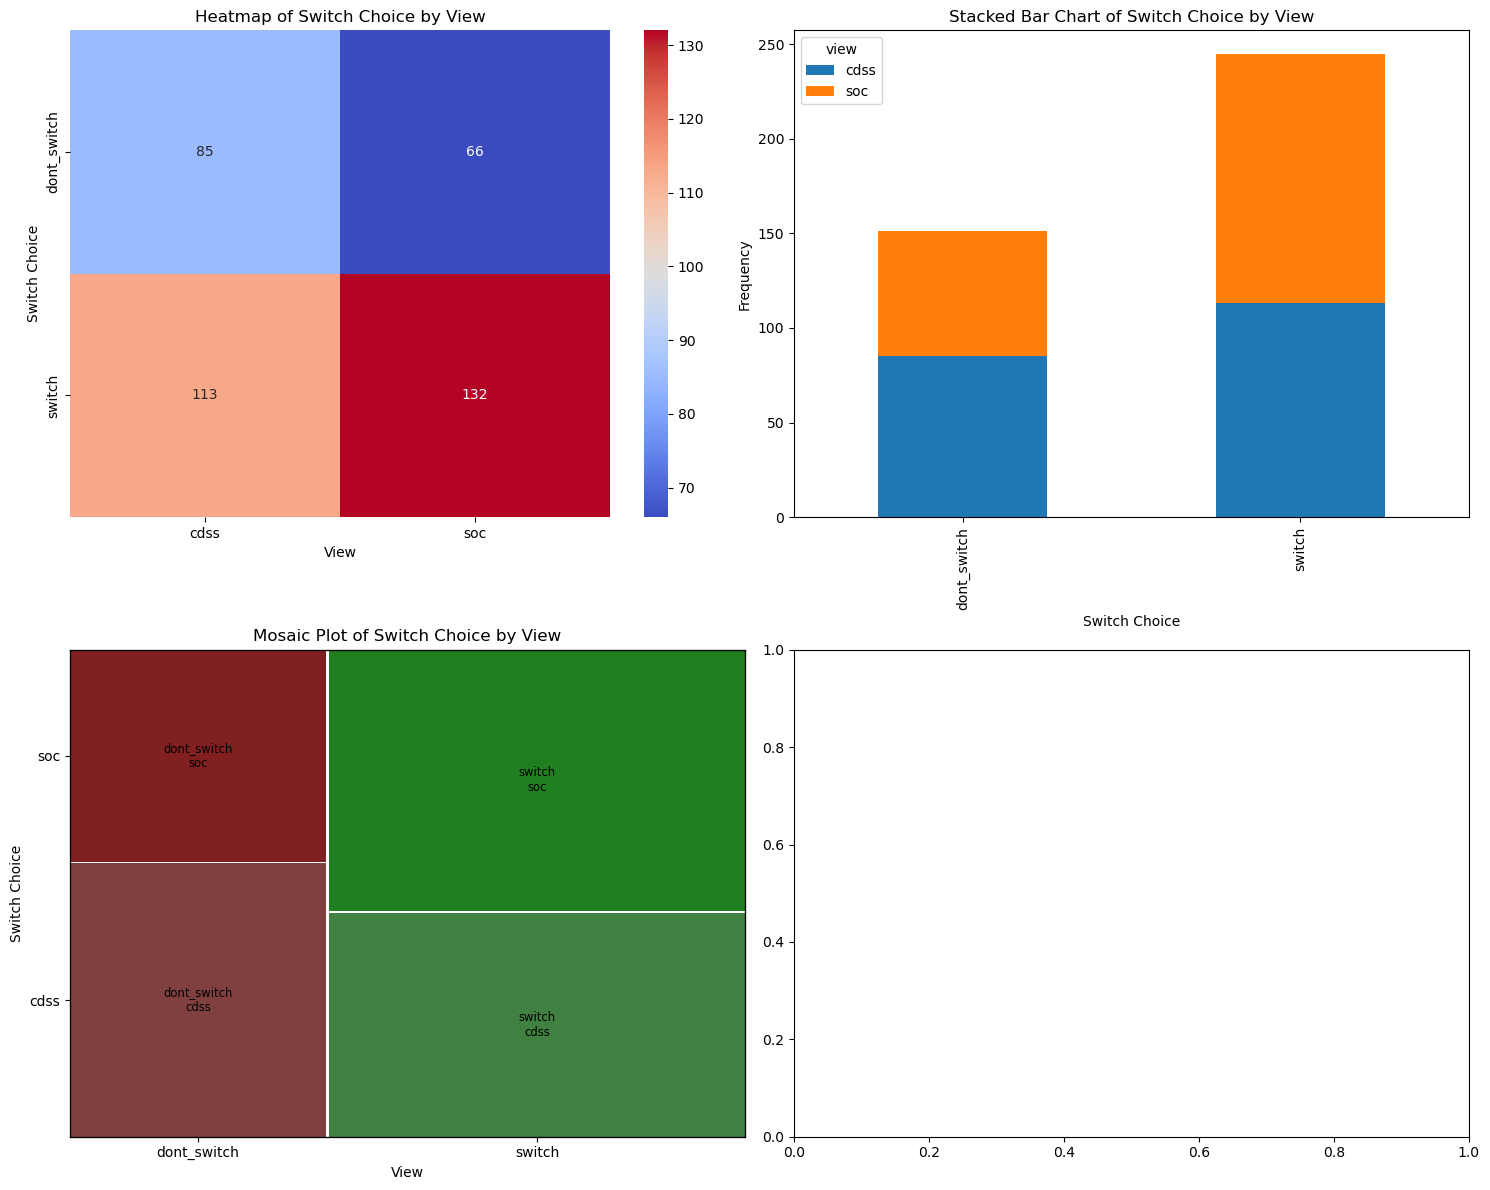

In [13]:
# Example contingency table
contingency_table = pd.crosstab(all_choices['switch_choice'], all_choices['view'])

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', ax=axs[0, 0])
axs[0, 0].set_title('Heatmap of Switch Choice by View')
axs[0, 0].set_xlabel('View')
axs[0, 0].set_ylabel('Switch Choice')

# Stacked Bar Chart
contingency_table.plot(kind='bar', stacked=True, ax=axs[0, 1])
axs[0, 1].set_title('Stacked Bar Chart of Switch Choice by View')
axs[0, 1].set_xlabel('Switch Choice')
axs[0, 1].set_ylabel('Frequency')

# Mosaic Plot
contingency_dict = contingency_table.stack().reset_index().set_index(['switch_choice', 'view'])[0].to_dict()
mosaic(contingency_dict, ax=axs[1, 0])
axs[1, 0].set_title('Mosaic Plot of Switch Choice by View')
axs[1, 0].set_xlabel('View')
axs[1, 0].set_ylabel('Switch Choice')

# Adjust layout
plt.tight_layout()
plt.show()

In [67]:
all_choices.groupby(['patient', 'view'])['switch_choice'].value_counts()

patient  view  switch_choice
1        cdss  dont_switch      17
         soc   dont_switch      16
2        cdss  switch           16
         soc   switch           15
               dont_switch       2
3        cdss  dont_switch      13
               switch            3
         soc   dont_switch      11
               switch            6
4        cdss  switch           15
               dont_switch       2
         soc   switch           16
5        cdss  switch           16
         soc   switch           15
               dont_switch       2
6        cdss  switch           13
               dont_switch       4
         soc   switch           16
7        cdss  dont_switch      12
               switch            5
         soc   switch           12
               dont_switch       4
8        cdss  switch           10
               dont_switch       6
         soc   switch            9
               dont_switch       8
9        cdss  switch           14
               dont_switch

<Axes: xlabel='view', ylabel='switch_choice'>

Text(0.5, 1.0, 'Heatmap of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(158.08159722222223, 0.5, 'Switch Choice')

<Axes: xlabel='view'>

Text(0.5, 1.0, 'Stacked Bar Chart of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(784.1881313131312, 0.5, 'Frequency')

[Text(0, 0, 'soc'), Text(1, 0, 'cdss')]

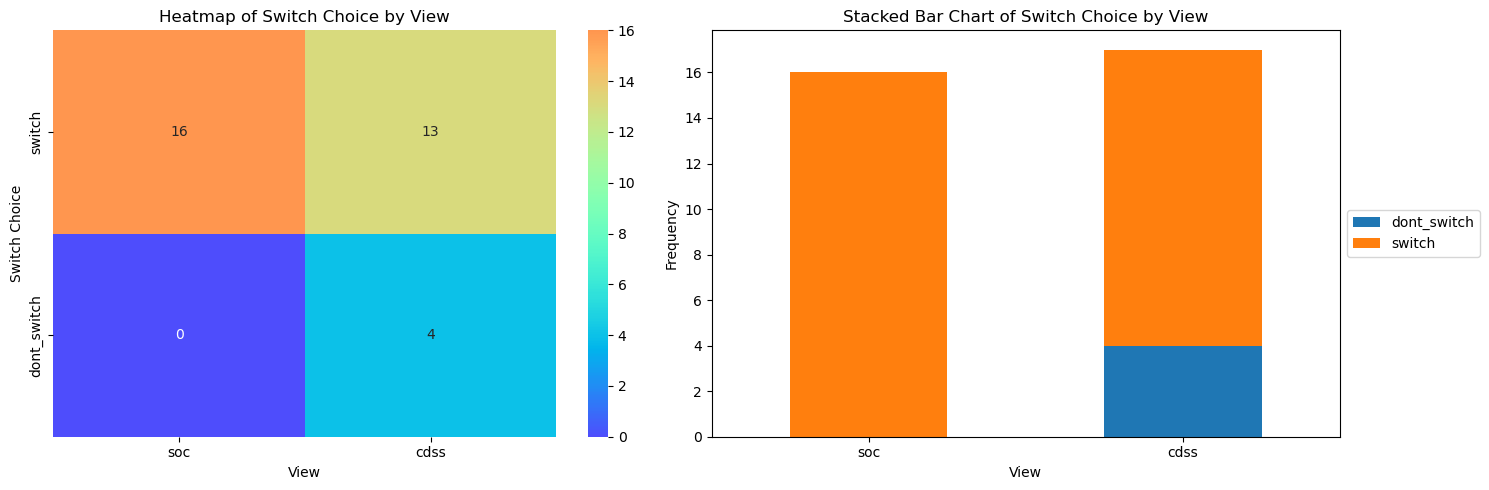

In [59]:
from matplotlib.colors import LinearSegmentedColormap

# Patient 6
contingency_table = pd.crosstab(all_choices[all_choices['patient'] == 6]['switch_choice'], all_choices[all_choices['patient'] == 6]['view'])

# Function to truncate a colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'truncated_cmap', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Choose a colormap and truncate it to focus on the central part
original_cmap = plt.get_cmap('rainbow')
truncated_cmap = truncate_colormap(original_cmap, 0.1, 0.8)

# Reorder soc and cdss
col = contingency_table.pop('soc')
contingency_table.insert(0, col.name, col)

# Fig
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap
sns.heatmap(contingency_table.reindex(["switch", "dont_switch"]), annot=True, fmt='d', cmap=truncated_cmap, ax=axs[0])
axs[0].set_title('Heatmap of Switch Choice by View')
axs[0].set_xlabel('View')
axs[0].set_ylabel('Switch Choice')

# Stacked Bar Chart
contingency_table.T.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Stacked Bar Chart of Switch Choice by View')
axs[1].set_xlabel('View')
axs[1].set_ylabel('Frequency')

# Place legend outside the plot
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# Rotate x labels
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)


# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='view', ylabel='switch_choice'>

Text(0.5, 1.0, 'Heatmap of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(158.08159722222223, 0.5, 'Switch Choice')

<Axes: xlabel='view'>

Text(0.5, 1.0, 'Stacked Bar Chart of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(784.1881313131312, 0.5, 'Frequency')

[Text(0, 0, 'soc'), Text(1, 0, 'cdss')]

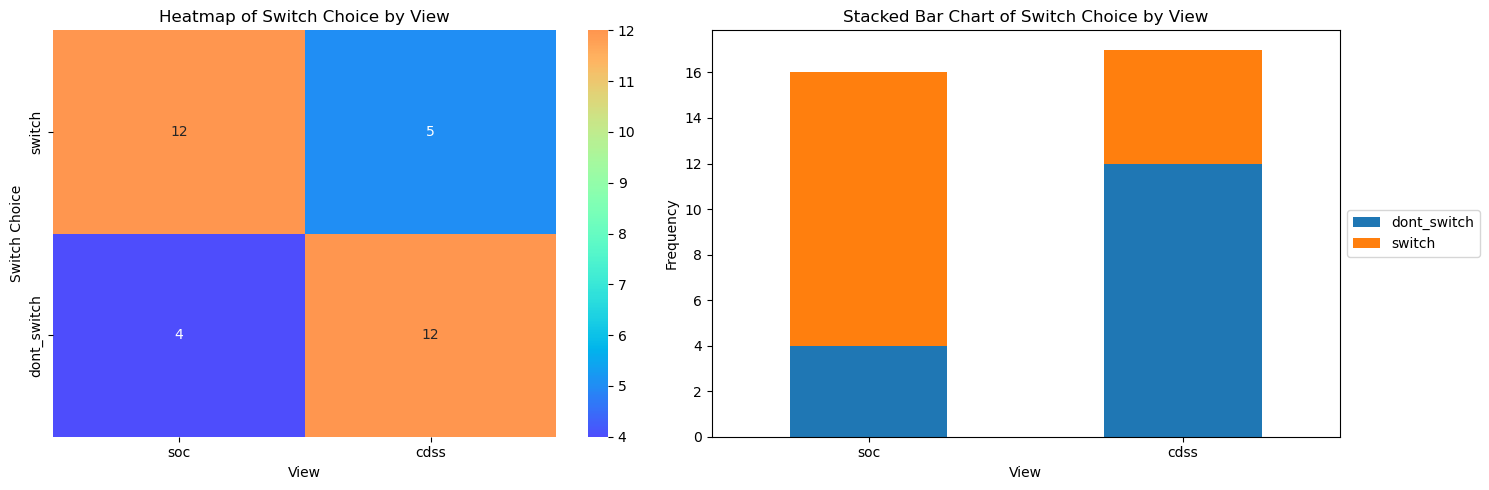

In [58]:
from matplotlib.colors import LinearSegmentedColormap

# Patient 7
contingency_table = pd.crosstab(all_choices[all_choices['patient'] == 7]['switch_choice'], all_choices[all_choices['patient'] == 7]['view'])

# Function to truncate a colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'truncated_cmap', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Choose a colormap and truncate it to focus on the central part
original_cmap = plt.get_cmap('rainbow')
truncated_cmap = truncate_colormap(original_cmap, 0.1, 0.8)

# Reorder soc and cdss
col = contingency_table.pop('soc')
contingency_table.insert(0, col.name, col)

# Fig
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap
sns.heatmap(contingency_table.reindex(["switch", "dont_switch"]), annot=True, fmt='d', cmap=truncated_cmap, ax=axs[0])
axs[0].set_title('Heatmap of Switch Choice by View')
axs[0].set_xlabel('View')
axs[0].set_ylabel('Switch Choice')

# Stacked Bar Chart
contingency_table.T.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Stacked Bar Chart of Switch Choice by View')
axs[1].set_xlabel('View')
axs[1].set_ylabel('Frequency')

# Place legend outside the plot
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# Rotate x labels
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)


# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='view', ylabel='switch_choice'>

Text(0.5, 1.0, 'Heatmap of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(158.08159722222223, 0.5, 'Switch Choice')

<Axes: xlabel='view'>

Text(0.5, 1.0, 'Stacked Bar Chart of Switch Choice by View')

Text(0.5, 25.722222222222214, 'View')

Text(784.1881313131312, 0.5, 'Frequency')

[Text(0, 0, 'soc'), Text(1, 0, 'cdss')]

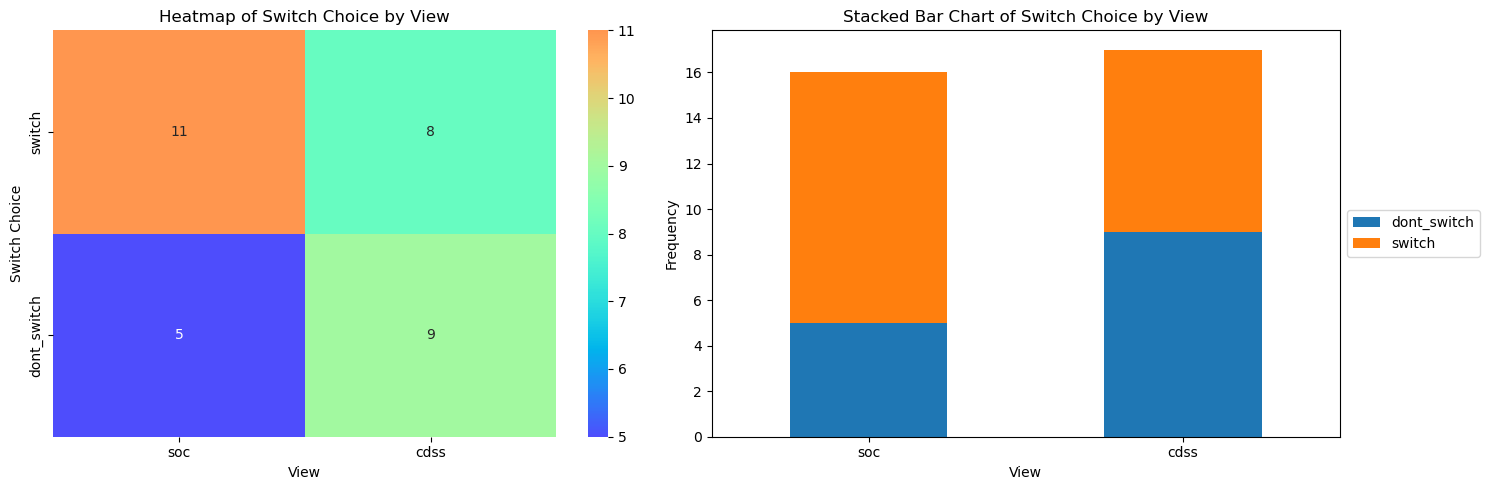

In [60]:
from matplotlib.colors import LinearSegmentedColormap

# Patient 7
contingency_table = pd.crosstab(all_choices[all_choices['patient'] == 10]['switch_choice'], all_choices[all_choices['patient'] == 10]['view'])

# Function to truncate a colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'truncated_cmap', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Choose a colormap and truncate it to focus on the central part
original_cmap = plt.get_cmap('rainbow')
truncated_cmap = truncate_colormap(original_cmap, 0.1, 0.8)

# Reorder soc and cdss
col = contingency_table.pop('soc')
contingency_table.insert(0, col.name, col)

# Fig
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap
sns.heatmap(contingency_table.reindex(["switch", "dont_switch"]), annot=True, fmt='d', cmap=truncated_cmap, ax=axs[0])
axs[0].set_title('Heatmap of Switch Choice by View')
axs[0].set_xlabel('View')
axs[0].set_ylabel('Switch Choice')

# Stacked Bar Chart
contingency_table.T.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Stacked Bar Chart of Switch Choice by View')
axs[1].set_xlabel('View')
axs[1].set_ylabel('Frequency')

# Place legend outside the plot
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# Rotate x labels
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)


# Adjust layout
plt.tight_layout()
plt.show()

# Others

In [ ]:
# Cant get this to work atm

# Define contingency table
contingency_table = pd.crosstab(all_choices['switch_choice'], all_choices['view'])

# Fit a log-linear model
exog, endog = sm.add_constant(all_choices['view']), all_choices['switch_choice']
mod = sm.GLM(endog, exog, family=sm.families.Poisson ,link=sm.families.links.log)
res = mod.fit()

# Summary of the results
print(res.summary())

In [61]:
# Function for Cochran-Mantel-Haenszel test
def cmh_test(df, exposure, outcome, stratify_by):
    #print(stratify_by)
    tables = []
    
    for stratify_level in df[stratify_by].unique():
        if stratify_level == stratify_level: # remove nan
            subset = df[df[stratify_by] == stratify_level]
            table = pd.crosstab(subset[exposure], subset[outcome])
            tables.append(table.values)
    #print(tables)
    
    # Sum tables across stratification levels
    summed_table = sum(tables)
    #print(summed_table)
    
    # Perform Chi-Square Test on the summed table
    chi2, p, dof, expected = chi2_contingency(summed_table, correction=False)
    
    return chi2, p, tables, summed_table

In [54]:
# Loop through each demographic
demographic_list = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
for demographic in demographic_list:
    chi2, p, tables, summed_table = cmh_test(all_choices, 'view', 'switch_choice', demographic)
    print(f"Cochran-Mantel-Haenszel Chi2: {chi2}, p-value: {p}")

user_archetype
[[ 85 113]
 [ 66 132]]
Cochran-Mantel-Haenszel Chi2: 3.864197864576294, p-value: 0.049326766966655854
age_new
[[ 81 111]
 [ 62 130]]
Cochran-Mantel-Haenszel Chi2: 4.0224008356788445, p-value: 0.04489975447312349
sex_new
[[ 85 113]
 [ 66 132]]
Cochran-Mantel-Haenszel Chi2: 3.864197864576294, p-value: 0.049326766966655854
medical_speciality_new
[[ 85 113]
 [ 66 132]]
Cochran-Mantel-Haenszel Chi2: 3.864197864576294, p-value: 0.049326766966655854
grade_new
[[ 85 113]
 [ 66 132]]
Cochran-Mantel-Haenszel Chi2: 3.864197864576294, p-value: 0.049326766966655854
ai_familiarity_new
[[ 74 100]
 [ 56 118]]
Cochran-Mantel-Haenszel Chi2: 3.9785462244177836, p-value: 0.04608332058679349


In [62]:
# Loop through each unique patient
for patient in all_choices['patient'].unique():
    # Subset the data for the specific patient
    subset_df = all_choices[all_choices['patient'] == patient]
    # Loop through each demographic
    demographic_list = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
    for demographic in demographic_list:
        chi2, p, tables, summed_table = cmh_test(subset_df, 'view', 'switch_choice', demographic)
        if p < 0.05:
            print(f"Patient: {patient}")
            print(f"Demographic: {demographic}")
            print(f"Cochran-Mantel-Haenszel Chi-square: {chi2}, p-value: {p}")
            print(f"  -> The differences in are statistically significant.\n")
            print(tables)
            print(summed_table)
print('Done')

Patient: 6
Demographic: sex_new
Cochran-Mantel-Haenszel Chi-square: 4.283975659229209, p-value: 0.03847325866217401
  -> The differences in are statistically significant.

[array([[2, 8],
       [0, 8]]), array([[2, 5],
       [0, 8]])]
[[ 4 13]
 [ 0 16]]
Patient: 6
Demographic: grade_new
Cochran-Mantel-Haenszel Chi-square: 4.283975659229209, p-value: 0.03847325866217401
  -> The differences in are statistically significant.

[array([[2, 4],
       [0, 6]]), array([[ 2,  9],
       [ 0, 10]])]
[[ 4 13]
 [ 0 16]]
Patient: 7
Demographic: age_new
Cochran-Mantel-Haenszel Chi-square: 5.764705882352941, p-value: 0.016351221575805836
  -> The differences in are statistically significant.

[array([[6, 1],
       [2, 3]]), array([[3, 1],
       [1, 5]]), array([[1, 2],
       [1, 2]]), array([[1],
       [1]]), array([[1, 0],
       [0, 1]])]
[[12  5]
 [ 5 12]]
Patient: 7
Demographic: sex_new
Cochran-Mantel-Haenszel Chi-square: 6.858347750865052, p-value: 0.008822809435952395
  -> The differenc

In [49]:
chi2, p = cmh_test(all_choices, 'view', 'switch_choice', 'patient')
print(f"Cochran-Mantel-Haenszel Chi2: {chi2}, p-value: {p}")

[array([[17],
       [16]]), array([[ 0, 16],
       [ 2, 15]]), array([[13,  3],
       [11,  6]]), array([[ 2, 15],
       [ 0, 16]]), array([[ 0, 16],
       [ 2, 15]]), array([[ 4, 13],
       [ 0, 16]]), array([[12,  5],
       [ 4, 12]]), array([[ 6, 10],
       [ 8,  9]]), array([[ 2, 14],
       [ 3, 14]]), array([[ 9,  8],
       [ 5, 11]]), array([[9, 8],
       [7, 9]]), array([[11,  5],
       [ 8,  9]])]
[[ 85 130]
 [ 66 148]]
Cochran-Mantel-Haenszel Chi2: 3.5538844106758236, p-value: 0.05940622814531912


# LR

In [64]:
# Create a mapping dictionary
view_mapping = {'cdss': 1, 'soc': 0, '1': 1, '0': 0}
switch_choice_mapping = {'switch': 1, 'dont_switch': 0, '1': 1, '0': 0}

# Map categorical values to numeric
all_choices['view_binary'] = all_choices['view'].map(view_mapping).astype('int')
all_choices['switch_choice_binary'] = all_choices['switch_choice'].map(switch_choice_mapping).astype('int')

In [65]:
# Logistic regression model
X = all_choices['view_binary']
y = all_choices['switch_choice_binary']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the model
logit_model = sm.Logit(y, X).fit(disp=0)

# Model summary
print(logit_model.summary())

                            Logit Regression Results                            
Dep. Variable:     switch_choice_binary   No. Observations:                  384
Model:                            Logit   Df Residuals:                      382
Method:                             MLE   Df Model:                            1
Date:                  Wed, 10 Jul 2024   Pseudo R-squ.:                0.007803
Time:                          18:05:25   Log-Likelihood:                -253.53
converged:                         True   LL-Null:                       -255.52
Covariance Type:              nonrobust   LLR p-value:                   0.04584
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6931      0.153      4.528      0.000       0.393       0.993
view_binary    -0.4206      0.211     -1.990      0.047      -0.835      -0.006


LLR p-value:
LLR p-value: 0.04584 - This is the p-value for the likelihood ratio test, which tests whether your model with predictors is significantly better than a model with no predictors. A p-value less than 0.05 indicates that your model is statistically significant.

Interpretation of Coefficient for view_binary
Coefficient (coef): -0.4206
The negative coefficient for view_binary means that an increase in the value of view_binary is associated with a decrease in the log odds of the outcome switch_choice_binary being 1.
To interpret this in terms of odds ratio:
Odds Ratio: exp(coef)=exp(−0.4206)≈0.657
The odds of switch_choice_binary being 1 are about 65.7% of the odds when view_binary is 0. In other words, if view_binary changes from 0 to 1, the odds of switch_choice_binary being 1 decrease by approximately 34.3%.
Significance (P>|z|): 0.047

The p-value is less than 0.05, which indicates that the effect of view_binary on switch_choice_binary is statistically significant.
Summary
Intercept: Significant, but its practical interpretation depends on the context of switch_choice_binary.
view_binary: Has a statistically significant negative effect on switch_choice_binary, suggesting that when view_binary increases, the probability of switch_choice_binary being 1 decreases.

In [76]:
# Loop through each unique patient
for patient in all_choices['patient'].unique():
    # Subset the data for the specific patient
    subset_df = all_choices[all_choices['patient'] == patient]

    # Logistic regression model
    X = subset_df['view_binary']
    y = subset_df['switch_choice_binary']

    # Adding a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fitting the model
    logit_model = sm.Logit(y, X).fit(disp=0)

    # Model summary
    print(f"Patient: {patient}")
    print(logit_model.summary())
    print("-" * 30)

Patient: 1
                            Logit Regression Results                            
Dep. Variable:     switch_choice_binary   No. Observations:                   32
Model:                            Logit   Df Residuals:                       30
Method:                             MLE   Df Model:                            1
Date:                  Wed, 10 Jul 2024   Pseudo R-squ.:                     inf
Time:                          18:34:51   Log-Likelihood:            -2.4486e-07
converged:                        False   LL-Null:                        0.0000
Covariance Type:              nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -17.9952   2020.883     -0.009      0.993   -3978.852    3942.862
view_binary   -26.7135   1.28e+09  -2.09e-08      1.000    -2.5e+09     2.5e+09

Complete Separation:

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Lik

Those that are statistically significant

6 - pvalue 0.01 - Odds Ratio: exp(coef)=exp(-19.6972)≈0. Model failed to converge. 


7 - pvalue 0.003 - Odds Ratio: exp(coef)=exp(-19.6972)≈0.11. The odds of switch_choice_binary being 1 are about 11% of the odds when view_binary is 0. In other words, if view_binary changes from 0 to 1, the odds of switch_choice_binary being 1 decrease by approximately 89%. Has a statistically significant negative effect on switch_choice_binary, suggesting that when view_binary increases, the probability of switch_choice_binary being 1 decreases. Good 7 CDSS says dont switch! How is this possible when decisions are the same? 

In [122]:
# Categorical Variables
all_choices_interaction = all_choices.copy()
all_choices_interaction.drop(columns=['view_binary'], inplace=True)
# One-hot encoding categorical variables
df_encoded = pd.get_dummies(all_choices_interaction, columns=['view', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new'], drop_first=True)

view_columns = ['view_soc']
demographic_columns = df_encoded.iloc[:,8:].columns.to_list()

# Convert to 0 and 1
df_encoded[demographic_columns] = df_encoded[demographic_columns].astype(int)
df_encoded[view_columns] = df_encoded[view_columns].astype(int)

# Fit logistic regression model by patient
results = {}
for patient in df_encoded['patient'].unique():
    # Subset the data for the specific patient
    subset_df = df_encoded[df_encoded['patient'] == patient]
    
    # Drop rows with missing values
    subset_df = subset_df.dropna(subset=['switch_choice'])
    
    # Check if there are enough rows to fit the model
    if len(subset_df) < 2:
        print(f"Patient: {patient}")
        print("Not enough data to fit the model.")
        print("-" * 30)
        continue
    
    # Logistic regression model
    X = subset_df[view_columns + demographic_columns]
    y = subset_df['switch_choice_binary']
    
    # Ensure X and y are in the correct format
    X = sm.add_constant(X)  # Add intercept
    
    # Fitting the model
    try:
        logit_model = sm.Logit(y, X).fit(disp=0)
        results[patient] = logit_model
        print(f"Patient: {patient}")
        print(logit_model.summary())
    except Exception as e:
        print(f"Error: {e}")
    
    print("-" * 30)

Patient: 1
                            Logit Regression Results                            
Dep. Variable:     switch_choice_binary   No. Observations:                   32
Model:                            Logit   Df Residuals:                       19
Method:                             MLE   Df Model:                           12
Date:                  Wed, 10 Jul 2024   Pseudo R-squ.:                     inf
Time:                          19:21:28   Log-Likelihood:            -1.5321e-13
converged:                        False   LL-Null:                        0.0000
Covariance Type:              nonrobust   LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -28.0814   3.31e+07  -8.47e-07      1.000   -6.49e+07    6.49e+07
view_soc                  

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  wa

In [118]:
# Interaction Terms with Categorical Variables
all_choices_interaction = all_choices.copy()
all_choices_interaction.drop(columns=['view_binary'], inplace=True)
# One-hot encoding categorical variables
df_encoded = pd.get_dummies(all_choices_interaction, columns=['view', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new'], drop_first=True)

view_columns = ['view_soc']
demographic_columns = df_encoded.iloc[:,8:].columns.to_list()
# Generate interaction terms
interaction_terms = []
for view_col in view_columns:
    for dem_col in demographic_columns:
        interaction_term = f'{view_col}:{dem_col}'
        df_encoded[interaction_term] = df_encoded[view_col] * df_encoded[dem_col]
        interaction_terms.append(interaction_term)

# Convert to 0 and 1
df_encoded[demographic_columns] = df_encoded[demographic_columns].astype(int)
df_encoded[interaction_terms] = df_encoded[interaction_terms].astype(int)
df_encoded[view_columns] = df_encoded[view_columns].astype(int)

# Fit logistic regression model by patient
results = {}
for patient in df_encoded['patient'].unique():
    # Subset the data for the specific patient
    subset_df = df_encoded[df_encoded['patient'] == patient]
    
    # Drop rows with missing values
    subset_df = subset_df.dropna(subset=['switch_choice'])
    
    # Check if there are enough rows to fit the model
    if len(subset_df) < 2:
        print(f"Patient: {patient}")
        print("Not enough data to fit the model.")
        print("-" * 30)
        continue
    
    # Logistic regression model
    X = subset_df[view_columns + demographic_columns + interaction_terms]
    y = subset_df['switch_choice_binary']
    
    # Ensure X and y are in the correct format
    X = sm.add_constant(X)  # Add intercept
    
    # Fitting the model
    try:
        logit_model = sm.Logit(y, X).fit(disp=0)
        results[patient] = logit_model
        print(f"Patient: {patient}")
        print(logit_model.summary())
    except Exception as e:
        print(f"Error: {e}")
    
    print("-" * 30)

# Print results for each patient
for patient, result in results.items():
    print(f"Patient: {patient}")
    print(result.summary())
    print("-" * 30)

Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------
Error: Singular matrix
------------------------------


/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  wa